# NullBot 0x0B Program Examples
> **Only tested on MK1**

## Settings for Jupyter

In [17]:
# fix Jupyter not autocompleting
%config Completer.use_jedi = False

In [18]:
# not used when installed with pip
import sys
sys.path.append("./software/JetsonCore")
sys.path.append("./software/JetsonCore/nullbot")

#### Imports

In [19]:
# many of these are not neccecary, but useful in the future
from nullbot import camera, ai, watchdog, modules
import sys, cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from time import sleep
from IPython.display import clear_output
import ipywidgets as widgets
import tensorflow as tf
import numpy as np
import pandas as pd

# Basic Movement

### Automated

In [20]:
# move forward, turn left, turn right
# all for one second each
# the modules address is 0x56, as detected by the coprocessor
drive_module = modules.DriveModule(0x56)

drive_module.forward(1)
drive_module.left(1)
drive_module.right(1)

### Buttons

In [21]:
# use jupyter buttons for interaction

# the modules address is 0x56, as detected by the coprocessor
drive_module = modules.DriveModule(0x56)

button_forward = widgets.Button(description="forward")
button_forward.on_click(lambda : drive_module.forward(1))
button_left = widgets.Button(description="left")
button_forward.on_click(lambda : drive_module.forward(1))
button_right = widgets.Button(description="right")
button_right.on_click(lambda : drive_module.right(1))
display(button_forward, button_left)

Button(description='forward', style=ButtonStyle())

Button(description='left', style=ButtonStyle())

# Camera

In [25]:
# run to clear callbacks and stop camera lock
watchdog.shutdown_all_threads()
camera.__activated = False

### Frame counter

In [22]:
# demonstrate how fast the camera can read images, convert and send to callback
count = 0

def show_image(image:Image)-> None:
    clear_output(wait=True)
    global count
    print(f"Frame: {count}")
    count += 1

camera.camera_with_callback(show_image)

Frame: 50


### Show image

Button(description='update image', style=ButtonStyle())

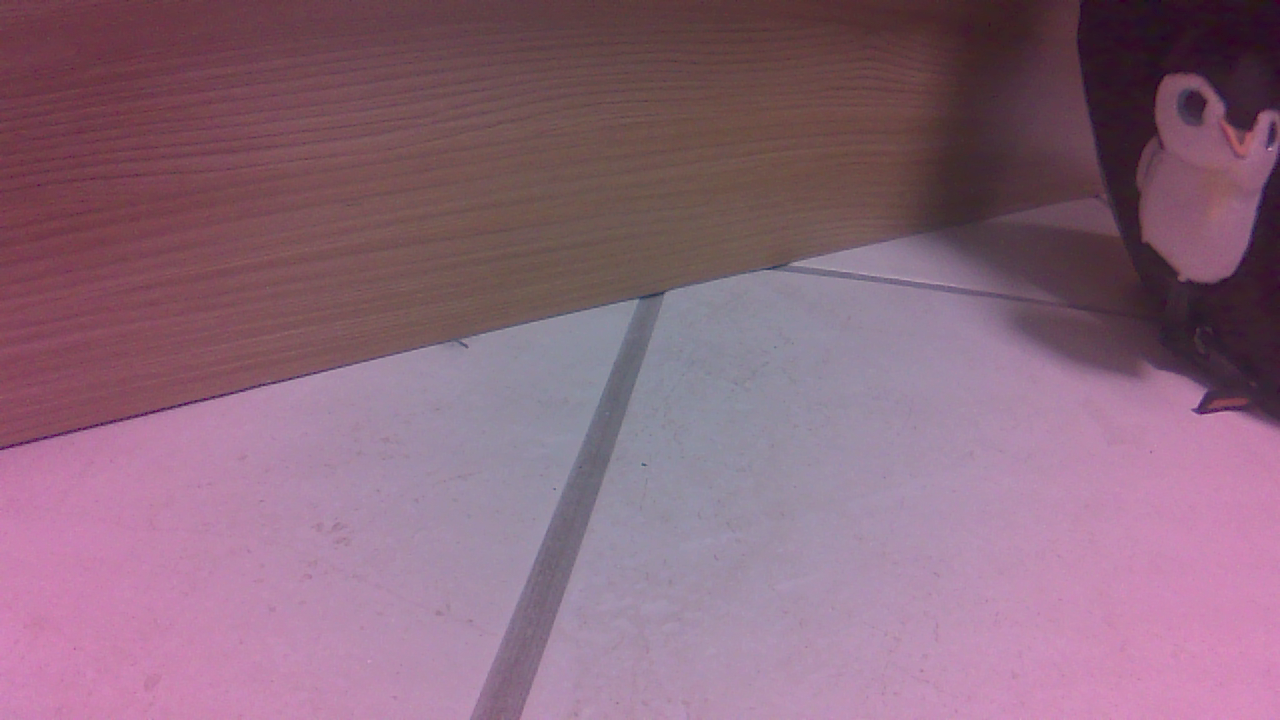

In [24]:
image = None

def update_image(i: Image) -> None:
    global image
    image = ImageOps.flip(i)

def show_image(_) -> None:
    clear_output(wait=True)
    display(button, image)

camera.camera_with_callback(update_image)
button = widgets.Button(description = "update image")
button.on_click(show_image)
display(button)

# Modules

### Rescan and list found modules

In [26]:
modules._coprocessor.read_scan()
for address in modules.found_modules:
    print(f"Found {hex(address)}")

Found 0x0
Found 0x31
Found 0x3c
Found 0x56


### Define custom module
*This Example uses the NullBot Dev Board*

In [27]:
# 0x01: onboard led on
# 0x02: onboard led off

class MyModule(modules.Base):
    def __init__(self) -> None:
        super().__init__(0x31)
    
    def on(self):
        self.send(0x01)
    
    def off(self):
        self.send(0x02)

mymodule = MyModule()
mymodule.on()
sleep(1)
mymodule.off()

### Oled status test

In [28]:
modules._coprocessor.display_error()
sleep(2)
modules._coprocessor.display_thread_failure()
sleep(2)
modules._coprocessor.display_all_running()

# WatchDog

### LoopThreads
##### It is very important that the functions do not loop forever, as the loopthreads loops the functions on its own

In [6]:
def loop_task() -> None:
    print("Ping")
    sleep(1)

task = watchdog.LoopThread(loop_task, name="Ping Task")
task.start()
sleep(3)
task.stop()

Ping
Ping
Ping


### Print running threads

In [14]:
def func():
    pass

task = watchdog.LoopThread(func, name="test Task")
task.start()

for thread in watchdog.registered_threads:
    print(f"Name: {thread.name}\nRunning: {thread.running}\n")

task.stop()

Name: Ping Task
Running: False

Name: Ping Task
Running: False

Name: test Task
Running: False

Name: test Task
Running: True



### Kill all running threads

In [16]:
# An example with the camera is above
watchdog.shutdown_all_threads()

# AI - Neural Networks

# WIP